## BOOK RECOMMENDATION SYSTEM USING `CHARLES DARWINS` PUBLISHED BOOKS

<img src="charles_darwin.jpg" alt="CharlesDarwin" width="300"/>

The Analysis in this notebook aims to find out the similarities in the books written by **charles dawin** especially books closely similar to the book "On the origin of species" which was published in 1959. He wrote about twenty books of which includes his most famous book *'Origin of Species'* .
In this notebook I will automatically detect how closely reltaed the books are to each other. 

To this purpose, I will develop the bases of a content-based book recommendation system, which will determine which books are close to each other based on how similar the discussed topics are. The methods used are commonly used in text- or documents-heavy industries such as legal, tech or customer support to perform some common task such as text classification or handling search engine queries.

**About The DataSet**

The dataset used to build this recommendation sytem was collected by [DataCamp](https://app.datacamp.com/learn) from [Project Gutenberg](https://www.gutenberg.org/) a library with over 60,000 books by DataCamp

In [1]:
#Lets take a look at the books to be used to build the recommendation engine

import glob   #Filename Pattern Matching Function 
files = glob.glob('dataset/' + '*txt')
files

['dataset\\Autobiography.txt',
 'dataset\\CoralReefs.txt',
 'dataset\\DescentofMan.txt',
 'dataset\\DifferentFormsofFlowers.txt',
 'dataset\\EffectsCrossSelfFertilization.txt',
 'dataset\\ExpressionofEmotionManAnimals.txt',
 'dataset\\FormationVegetableMould.txt',
 'dataset\\FoundationsOriginofSpecies.txt',
 'dataset\\GeologicalObservationsSouthAmerica.txt',
 'dataset\\InsectivorousPlants.txt',
 'dataset\\LifeandLettersVol1.txt',
 'dataset\\LifeandLettersVol2.txt',
 'dataset\\MonographCirripedia.txt',
 'dataset\\MonographCirripediaVol2.txt',
 'dataset\\MovementClimbingPlants.txt',
 'dataset\\OriginofSpecies.txt',
 'dataset\\PowerMovementPlants.txt',
 'dataset\\VariationPlantsAnimalsDomestication.txt',
 'dataset\\VolcanicIslands.txt',
 'dataset\\VoyageBeagle.txt']

In [2]:
#lets read the content of each file

import re
import os

txts = []
titles = []

for file in files:
    f = open(file,encoding='utf-8-sig')
    data = re.sub('[\W]+',' ',f.read()) #replacing all non-alpha-numeric characters in the file with nothing
    txts.append(data)
    titles.append(os.path.basename(file).replace('.txt','')) #os.path.filename returns the basename of a file path.

In [3]:
titles

['Autobiography',
 'CoralReefs',
 'DescentofMan',
 'DifferentFormsofFlowers',
 'EffectsCrossSelfFertilization',
 'ExpressionofEmotionManAnimals',
 'FormationVegetableMould',
 'FoundationsOriginofSpecies',
 'GeologicalObservationsSouthAmerica',
 'InsectivorousPlants',
 'LifeandLettersVol1',
 'LifeandLettersVol2',
 'MonographCirripedia',
 'MonographCirripediaVol2',
 'MovementClimbingPlants',
 'OriginofSpecies',
 'PowerMovementPlants',
 'VariationPlantsAnimalsDomestication',
 'VolcanicIslands',
 'VoyageBeagle']

In [4]:
txts[0]

' THE AUTOBIOGRAPHY OF CHARLES DARWIN From The Life and Letters of Charles Darwin By Charles Darwin Edited by his Son Francis Darwin My father s autobiographical recollections given in the present chapter were written for his children and written without any thought that they would ever be published To many this may seem an impossibility but those who knew my father will understand how it was not only possible but natural The autobiography bears the heading Recollections of the Development of my Mind and Character and end with the following note Aug 3 1876 This sketch of my life was begun about May 28th at Hopedene Mr Hensleigh Wedgwood s house in Surrey and since then I have written for nearly an hour on most afternoons It will easily be understood that in a narrative of a personal and intimate kind written for his wife and children passages should occur which must here be omitted and I have not thought it necessary to indicate where such omissions are made It has been found necessary

In [5]:
#get len of each text in texts using list comprehension
booktext_len = [len(t) for t in txts]
booktext_len

[123235,
 496068,
 1776539,
 617088,
 913713,
 624665,
 335920,
 525423,
 797401,
 901406,
 1047518,
 1010645,
 773930,
 1678048,
 298319,
 916536,
 1093606,
 1046071,
 341447,
 1149668]

In [6]:
# Browse the list containing all the titles
for i in range(len(titles)):
    # Store the index if the title is "OriginofSpecies"
    if(titles[i] == 'OriginofSpecies'):
        ori = i
print(str(ori))

15


In [7]:
#Creating a dataframe showing the titles and the length of text in each book
import pandas as pd

book_len_df = pd.DataFrame(list(zip(titles,booktext_len)), columns=['Book_Title','Text_length'])
book_len_df.sort_values(by='Text_length',ascending=False)

,Book_Title,Text_length
2,DescentofMan,1776539
13,MonographCirripediaVol2,1678048
19,VoyageBeagle,1149668
16,PowerMovementPlants,1093606
10,LifeandLettersVol1,1047518
17,VariationPlantsAnimalsDomestication,1046071
11,LifeandLettersVol2,1010645
15,OriginofSpecies,916536
4,EffectsCrossSelfFertilization,913713
9,InsectivorousPlants,901406


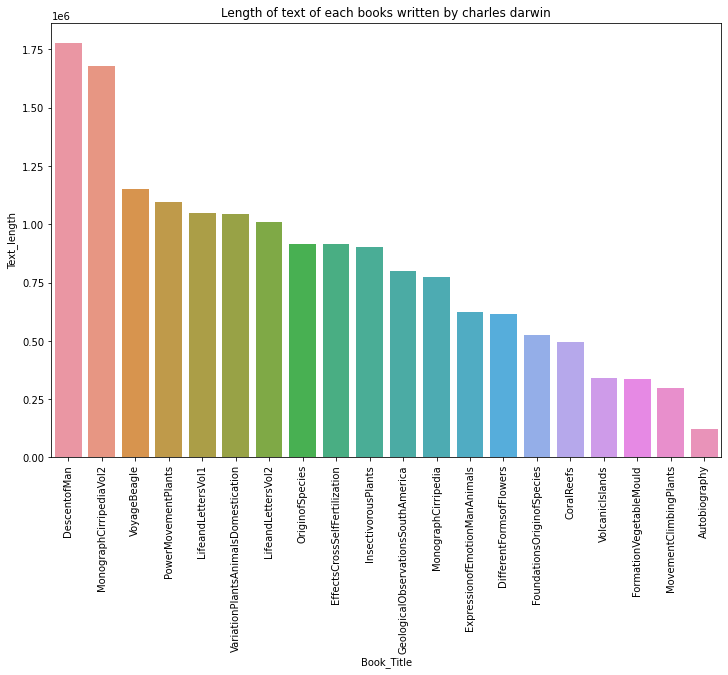

In [8]:
#Visualizing the length of each text of books
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)

sns.barplot(x='Book_Title',y='Text_length',data=book_len_df.sort_values(by='Text_length',ascending=False))
plt.xticks(rotation=90)
plt.title('Length of text of each books written by charles darwin')

plt.show()

In [9]:
#import stopwrds
from nltk.corpus import stopwords

stopwords = stopwords.words('english')
print(stopwords)
print(len(stopwords))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
#tokenize words in txts

txts_lower = [txt.lower() for txt in txts]

#transform words to tokens

txts_tokenize = [txt.split() for txt in txts_lower]

#remove stop words which are part of the list of stopwords from tokens

texts = [[word for word in txt if word not in stopwords] for txt in txts_tokenize]


In [11]:
txts_tokenize 

[['the',
  'autobiography',
  'of',
  'charles',
  'darwin',
  'from',
  'the',
  'life',
  'and',
  'letters',
  'of',
  'charles',
  'darwin',
  'by',
  'charles',
  'darwin',
  'edited',
  'by',
  'his',
  'son',
  'francis',
  'darwin',
  'my',
  'father',
  's',
  'autobiographical',
  'recollections',
  'given',
  'in',
  'the',
  'present',
  'chapter',
  'were',
  'written',
  'for',
  'his',
  'children',
  'and',
  'written',
  'without',
  'any',
  'thought',
  'that',
  'they',
  'would',
  'ever',
  'be',
  'published',
  'to',
  'many',
  'this',
  'may',
  'seem',
  'an',
  'impossibility',
  'but',
  'those',
  'who',
  'knew',
  'my',
  'father',
  'will',
  'understand',
  'how',
  'it',
  'was',
  'not',
  'only',
  'possible',
  'but',
  'natural',
  'the',
  'autobiography',
  'bears',
  'the',
  'heading',
  'recollections',
  'of',
  'the',
  'development',
  'of',
  'my',
  'mind',
  'and',
  'character',
  'and',
  'end',
  'with',
  'the',
  'following',
  'no

In [12]:
# Print the first 20 tokens for the "On the Origin of Species" book
texts[ori][:20]

['origin',
 'species',
 'regard',
 'material',
 'world',
 'least',
 'go',
 'far',
 'perceive',
 'events',
 'brought',
 'insulated',
 'interpositions',
 'divine',
 'power',
 'exerted',
 'particular',
 'case',
 'establishment',
 'general']

**Stemming the tokens**

In [13]:
from nltk.stem import PorterStemmer # Loading the Porter stemming function from the nltk package
porterstemmer = PorterStemmer()   # Create an instance of a PorterStemmer object

In [14]:
# For each token of each text, we generated its stem 
stemmed_words = [[porterstemmer.stem(token) for token in txt]for txt in texts] 

In [15]:
stemmed_words[ori][:20]  # Print the 20 first stemmed tokens from the "On the Origin of Species"

['origin',
 'speci',
 'regard',
 'materi',
 'world',
 'least',
 'go',
 'far',
 'perceiv',
 'event',
 'brought',
 'insul',
 'interposit',
 'divin',
 'power',
 'exert',
 'particular',
 'case',
 'establish',
 'gener']

**Building the bag of words model**

After transforming our text into tokens,we need to create a universe of all words contained in our corpus of charles dawin books. Then using the stemmed tokens and the dictionary a bag of words model wl be created fro each of our texts.

In [16]:
#loading function that allows to create and use dictionaries
from gensim import corpora

In [17]:
#creating dictionary of stemmed words

dictionary = corpora.Dictionary(stemmed_words)
print(dictionary)

Dictionary(31027 unique tokens: ['1', '11th', '1250', '12th', '13th']...)


In [18]:
dictionary

`we have 31,027 unique words in our corpus`

In [19]:
print('There are'+ ' ' + str(dictionary.num_docs)+ ' ' + 'documents in our copus')

There are 20 documents in our copus


In [20]:
dictionary.token2id

{'1': 0,
 '11th': 1,
 '1250': 2,
 '12th': 3,
 '13th': 4,
 '14': 5,
 '15': 6,
 '15th': 7,
 '16': 8,
 '1809': 9,
 '1817': 10,
 '1818': 11,
 '1819': 12,
 '1822': 13,
 '1825': 14,
 '1826': 15,
 '1827': 16,
 '1828': 17,
 '1831': 18,
 '1835': 19,
 '1836': 20,
 '1837': 21,
 '1838': 22,
 '1839': 23,
 '1840': 24,
 '1841': 25,
 '1842': 26,
 '1844': 27,
 '1845': 28,
 '1846': 29,
 '1848': 30,
 '1854': 31,
 '1856': 32,
 '1857': 33,
 '1858': 34,
 '1859': 35,
 '1860': 36,
 '1862': 37,
 '1864': 38,
 '1868': 39,
 '1871': 40,
 '1872': 41,
 '1874': 42,
 '1875': 43,
 '1876': 44,
 '1877': 45,
 '1879': 46,
 '1880': 47,
 '1881': 48,
 '1883': 49,
 '1884': 50,
 '1st': 51,
 '2': 52,
 '20th': 53,
 '230': 54,
 '24th': 55,
 '265': 56,
 '27': 57,
 '27th': 58,
 '28th': 59,
 '29': 60,
 '2nd': 61,
 '3': 62,
 '3000': 63,
 '31': 64,
 '35': 65,
 '39': 66,
 '446': 67,
 '449': 68,
 '45': 69,
 '5': 70,
 '5267': 71,
 '6th': 72,
 '7th': 73,
 '8': 74,
 '800': 75,
 '82': 76,
 '8500': 77,
 '900': 78,
 '_borrowed_': 79,
 '_named_

In [21]:
# Creating a bag-of-words model for each book, using the previously generated dictionary
bag_of_words = [dictionary.doc2bow(text) for text in stemmed_words]
bag_of_words

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 2),
  (15, 2),
  (16, 1),
  (17, 3),
  (18, 5),
  (19, 1),
  (20, 2),
  (21, 3),
  (22, 5),
  (23, 8),
  (24, 2),
  (25, 1),
  (26, 8),
  (27, 2),
  (28, 1),
  (29, 3),
  (30, 2),
  (31, 1),
  (32, 3),
  (33, 1),
  (34, 4),
  (35, 3),
  (36, 3),
  (37, 2),
  (38, 1),
  (39, 2),
  (40, 1),
  (41, 1),
  (42, 2),
  (43, 3),
  (44, 6),
  (45, 1),
  (46, 1),
  (47, 2),
  (48, 4),
  (49, 1),
  (50, 1),
  (51, 3),
  (52, 2),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 2),
  (59, 1),
  (60, 2),
  (61, 2),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 2),
  (83, 10),
  (84, 1),
  (85, 2),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1

In [22]:
bag_of_words[ori][:5]

[(0, 11), (5, 51), (6, 1), (8, 2), (21, 1)]

**lets find out the most common words in the book 'Origin of Species'**

In [23]:
import pandas as pd

In [24]:
#converting the bag of words model for the 'origin of species' to a dataframe
df_bow_species = pd.DataFrame(bag_of_words[ori])

# Adding the column names to the DataFrame
df_bow_species.columns = ['index','occurrences']
df_bow_species

,index,occurrences
0,0,11
1,5,51
2,6,1
3,8,2
4,21,1
...,...,...
5073,26749,1
5074,26750,1
5075,26751,1
5076,26752,1


In [25]:
# Adding a column containing the token corresponding to the dictionary index
df_bow_species['token'] = [dictionary[i] for i in df_bow_species['index']]

In [26]:
df_bow_species

,index,occurrences,token
0,0,11,1
1,5,51,14
2,6,1,15
3,8,2,16
4,21,1,1837
...,...,...,...
5073,26749,1,volan
5074,26750,1,wallow
5075,26751,1,wand
5076,26752,1,whimsic


In [27]:
print(df_bow_species.sort_values(by='occurrences',ascending=False)[:10])

      index  occurrences    token
1422   2224         1542    speci
1018   1611          676    natur
409     682          665   differ
1065   1685          657      one
617     988          618     form
1632   2531          515  varieti
957    1508          510      may
236     404          509     case
1697   2636          496    would
653    1047          463    gener


**Building the tf-idf model**

In [28]:
# Load the gensim functions that will allow us to generate tf-idf models
from gensim.models import TfidfModel

# Generate the tf-idf model
model = TfidfModel(bag_of_words)

# Print the model for "On the Origin of Species"
model[bag_of_words[ori]]
# ... YOUR CODE FOR TASK 8 ...

[(8, 0.00020156780417761362),
 (21, 0.0005652536490173743),
 (23, 0.0016928522043821075),
 (27, 0.0006386523647448507),
 (28, 0.002539278306573161),
 (31, 0.0008464261021910537),
 (35, 0.0010036984417709938),
 (36, 0.0010036984417709938),
 (51, 0.00043844479275361933),
 (54, 0.0020073968835419877),
 (56, 0.002349326416586897),
 (57, 0.00010078390208880681),
 (63, 0.002723867843264965),
 (64, 0.0005039195104440341),
 (66, 0.00020156780417761362),
 (67, 0.002349326416586897),
 (68, 0.0020073968835419877),
 (75, 0.0013619339216324824),
 (76, 0.00043844479275361933),
 (78, 0.004125497161742769),
 (82, 0.0020627485808713845),
 (85, 0.008478804735260614),
 (86, 0.0005039195104440341),
 (88, 0.002418813650131364),
 (89, 0.0033258687689306254),
 (90, 0.0008768895855072387),
 (91, 0.0016561453532470858),
 (94, 0.0008768895855072387),
 (95, 0.00043844479275361933),
 (96, 0.0035075583420289547),
 (97, 0.001612542433420909),
 (102, 0.03726780738405765),
 (104, 0.0009070551187992614),
 (106, 0.0014

**result of the tf-idf vectorizer**

In [29]:
# Convert the tf-idf model for "On the Origin of Species" into a DataFrame
df_tfidf = pd.DataFrame(model[bag_of_words[ori]])

# Name the columns of the DataFrame id and score
df_tfidf.columns = ['id','score']
# ... YOUR CODE FOR TASK 9 ...

# Add the tokens corresponding to the numerical indices for better readability
# ... YOUR CODE FOR TASK 9 ...
df_tfidf['token'] = [dictionary[i] for i in list(df_tfidf["id"])  ]

# Sort the DataFrame by descending tf-idf score and print the first 10 rows.
df_tfidf.sort_values(by='score',ascending= False)[:10]
# ... YOUR CODE FOR TASK 9 ...

,id,score,token
873,2103,0.322375,select
3090,10019,0.201642,pigeon
128,354,0.195524,breed
2972,9306,0.165635,migrat
939,2261,0.146540,steril
285,730,0.144368,domest
3659,13986,0.130110,_
501,1217,0.126147,hybrid
371,941,0.125271,fertil
3855,16491,0.123010,gärtner


**computing distance between text**

In [30]:
# Load the library allowing similarity computations
from gensim import similarities

# Compute the similarity matrix (pairwise distance between all texts)
sims = similarities.MatrixSimilarity(model[bag_of_words])

# Transform the resulting list into a dataframe
sim_df = pd.DataFrame(list(sims))

In [31]:
sim_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.049237,0.080235,0.066347,0.077055,0.087831,0.040685,0.026525,0.030250,0.014838,0.534997,0.292161,0.005506,0.006673,0.022851,0.098686,0.016115,0.043821,0.038230,0.181494
1,0.049237,1.000000,0.009462,0.001949,0.001924,0.004971,0.029394,0.010097,0.060775,0.002252,0.044122,0.026313,0.005934,0.008951,0.001517,0.038707,0.002670,0.010329,0.057369,0.267450
2,0.080235,0.009462,1.000000,0.072472,0.029918,0.146462,0.027027,0.061512,0.009592,0.009399,0.086791,0.130198,0.051466,0.036483,0.005130,0.263388,0.011199,0.207145,0.007832,0.123499
3,0.066347,0.001949,0.072472,1.000000,0.391408,0.006500,0.010569,0.017557,0.002867,0.007458,0.023960,0.076875,0.008920,0.004451,0.008211,0.126853,0.018835,0.044339,0.002601,0.013100
4,0.077055,0.001924,0.029918,0.391408,1.000000,0.006832,0.032246,0.016768,0.002239,0.006753,0.029386,0.076840,0.003002,0.002354,0.015048,0.144082,0.039789,0.048506,0.002171,0.017180
5,0.087831,0.004971,0.146462,0.006500,0.006832,1.000000,0.020952,0.022858,0.005163,0.011464,0.092730,0.076955,0.018491,0.027041,0.005934,0.062360,0.011238,0.076107,0.005539,0.097987
6,0.040685,0.029394,0.027027,0.010569,0.032246,0.020952,1.000000,0.009809,0.067633,0.035434,0.042218,0.039114,0.019356,0.020726,0.038783,0.049083,0.039878,0.029882,0.059280,0.098254
7,0.026525,0.010097,0.061512,0.017557,0.016768,0.022858,0.009809,0.999998,0.012455,0.002742,0.037419,0.038689,0.081511,0.097407,0.001787,0.174792,0.003944,0.116597,0.007985,0.040773
8,0.030250,0.060775,0.009592,0.002867,0.002239,0.005163,0.067633,0.012455,1.000000,0.006752,0.040585,0.017450,0.008752,0.018931,0.001970,0.052104,0.003323,0.012363,0.372155,0.259509
9,0.014838,0.002252,0.009399,0.007458,0.006753,0.011464,0.035434,0.002742,0.006752,1.000000,0.008931,0.027134,0.018578,0.017001,0.248891,0.014670,0.022637,0.009269,0.008457,0.014691


In [32]:
# Add the titles of the books as columns and index of the dataframe
# ... YOUR CODE FOR TASK 10 ...
sim_df.columns = titles
sim_df.index = titles

# Print the resulting matrix
sim_df
# ... YOUR CODE FOR TASK 10 ...

,Autobiography,CoralReefs,DescentofMan,DifferentFormsofFlowers,EffectsCrossSelfFertilization,ExpressionofEmotionManAnimals,FormationVegetableMould,FoundationsOriginofSpecies,GeologicalObservationsSouthAmerica,InsectivorousPlants,LifeandLettersVol1,LifeandLettersVol2,MonographCirripedia,MonographCirripediaVol2,MovementClimbingPlants,OriginofSpecies,PowerMovementPlants,VariationPlantsAnimalsDomestication,VolcanicIslands,VoyageBeagle
Autobiography,1.000000,0.049237,0.080235,0.066347,0.077055,0.087831,0.040685,0.026525,0.030250,0.014838,0.534997,0.292161,0.005506,0.006673,0.022851,0.098686,0.016115,0.043821,0.038230,0.181494
CoralReefs,0.049237,1.000000,0.009462,0.001949,0.001924,0.004971,0.029394,0.010097,0.060775,0.002252,0.044122,0.026313,0.005934,0.008951,0.001517,0.038707,0.002670,0.010329,0.057369,0.267450
DescentofMan,0.080235,0.009462,1.000000,0.072472,0.029918,0.146462,0.027027,0.061512,0.009592,0.009399,0.086791,0.130198,0.051466,0.036483,0.005130,0.263388,0.011199,0.207145,0.007832,0.123499
DifferentFormsofFlowers,0.066347,0.001949,0.072472,1.000000,0.391408,0.006500,0.010569,0.017557,0.002867,0.007458,0.023960,0.076875,0.008920,0.004451,0.008211,0.126853,0.018835,0.044339,0.002601,0.013100
EffectsCrossSelfFertilization,0.077055,0.001924,0.029918,0.391408,1.000000,0.006832,0.032246,0.016768,0.002239,0.006753,0.029386,0.076840,0.003002,0.002354,0.015048,0.144082,0.039789,0.048506,0.002171,0.017180
ExpressionofEmotionManAnimals,0.087831,0.004971,0.146462,0.006500,0.006832,1.000000,0.020952,0.022858,0.005163,0.011464,0.092730,0.076955,0.018491,0.027041,0.005934,0.062360,0.011238,0.076107,0.005539,0.097987
FormationVegetableMould,0.040685,0.029394,0.027027,0.010569,0.032246,0.020952,1.000000,0.009809,0.067633,0.035434,0.042218,0.039114,0.019356,0.020726,0.038783,0.049083,0.039878,0.029882,0.059280,0.098254
FoundationsOriginofSpecies,0.026525,0.010097,0.061512,0.017557,0.016768,0.022858,0.009809,0.999998,0.012455,0.002742,0.037419,0.038689,0.081511,0.097407,0.001787,0.174792,0.003944,0.116597,0.007985,0.040773
GeologicalObservationsSouthAmerica,0.030250,0.060775,0.009592,0.002867,0.002239,0.005163,0.067633,0.012455,1.000000,0.006752,0.040585,0.017450,0.008752,0.018931,0.001970,0.052104,0.003323,0.012363,0.372155,0.259509
InsectivorousPlants,0.014838,0.002252,0.009399,0.007458,0.006753,0.011464,0.035434,0.002742,0.006752,1.000000,0.008931,0.027134,0.018578,0.017001,0.248891,0.014670,0.022637,0.009269,0.008457,0.014691


**The book most similar to "On the Origin of Species"**

Text(0.5, 0, 'Cosine distance')

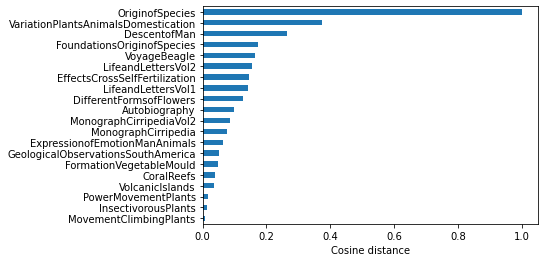

In [33]:
# This is needed to display plots in a notebook
%matplotlib inline

# Import libraries
import matplotlib.pyplot as plt

# Select the column corresponding to "On the Origin of Species" and 
v = sim_df['OriginofSpecies']

# Sort by ascending scores
v_sorted = v.sort_values(ascending=True)

# Plot this data has a horizontal bar plot
v_sorted.plot.barh(x='lab',y='val',rot=0).plot()
# ... YOUR CODE FOR TASK 11 ...

# Modify the axes labels and plot title for a better readability
plt.xlabel("Cosine distance")

From the chart above it can be seen that there are alot of books that have simlar content to that of the `Origin of species`,of all the books with similar contents as the origin of species, only two books were significantly similar to our book of interest,this books are: 

* ##### Variation Plants Animals Destication #####
* ##### Descent of man #####
